# Team 5 - Northern and Central America Data Analysis
### Python analysis of 2017 World Bank Data - Hult International Business School
<br>

##### Authors:
- William Johnsen
- Paula Lucena
- Ivan Manurung
- Tianna Nand
- Hao Ni
- Arnaldo Vera

<br>

In this analysis, we are going to focus in three main factors: Economical, Poverty and Demographic. The objective is to study the differences between northern and central America as well as the key differentiators between countries.  

## Setting up files and DataFrames
<br><br>

In [16]:
#importing packages for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


##############################################################################
##### READING FILES AND SETING UP DATAFRAMES
##############################################################################
file1 = 'WDIW Dataset.xlsx'
file2 = 'WDI_Metadata.xlsx'
wdiw_data = pd.read_excel(file1)
meta_data_sheet_2 =pd.read_excel(file2, sheet_name = 'Country - Metadata') #Reading meta data file for later use

#Creating a data frame only for 'Hot Rod' countries (Northern America and Caribbean)
wdiw_hr = wdiw_data.loc[wdiw_data['Cool Name'] == 'Hot Rod'] 


<br>

## Missing values Imputation and handling

<br><br>

In [17]:

##############################################################################
##### MISSING VALUES
##############################################################################


#Checking types of series
print(wdiw_hr.info(verbose=True))
#The numeric variables are floats! We wont change the type


#Looking for the amount of missing values
missing_values = wdiw_hr.isnull().sum()
print(missing_values)


#Looking for the percentage of missing values
pd.set_option('display.max_rows', 410)
percentage_missing = wdiw_hr.isnull().mean().round(2)*100
print(percentage_missing)


#Flagging missing values
for col in wdiw_hr:
    if wdiw_hr[col].isnull().astype(int).sum() > 0:
        wdiw_hr['m_' + col] = wdiw_hr[col].isnull().astype(int)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 19 to 205
Data columns (total 67 columns):
Country Code                                                                                                  11 non-null object
Country Name                                                                                                  11 non-null object
Hult Region                                                                                                   11 non-null object
Cool Name                                                                                                     11 non-null object
Access to electricity (% of population)                                                                       11 non-null float64
Access to electricity, rural (% of rural population)                                                          11 non-null float64
Access to electricity, urban (% of urban population)                                                          11 non-nu

/Users/arnaldo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [18]:
##############################################
#MISSING VALUES FROM EXTERNAL OTHER RESOURCES#
##############################################

filling_values = {
    'Adolescent fertility rate (births per 1,000 women ages 15-19)':
                    [68.487,
                    0.0579,
                    8.387,
                    53.46,
                    69.459,
                    70.93,
                    72.912,
                    60.365,
                    84.99,
                    81.828,
                    19.86],
#https://www.indexmundi.com/bermuda/total_fertility_rate.html
#Total fertility rate by the percentage of people between this ages 1.93 
#https://www.paho.org/adolescent-health-report-2018/images/profiles/Bermuda-PAHO%20Adolescents%20and%20Youth%20Health%20Country%20Profile%20V5.0.pdf
#2,126 (3% Female)... 12,758 Total youth that is 18% 0.0
                  
    'Age dependency ratio (% of working-age population)': 
                    [55.08547326,
                    43,
                    8.61607884,
                    44.56692021,
                    55.15985313,
                    65.9674161,
                    58.49347529,
                    51.46924127,
                    5.28115039,
                    54.4387154,
                    52.1558055],
#https://www.boleat.com/materials/population_trends_and_issues_2016.pdf Input bermuda dependency ratio 2016
                  
    'Agriculture, forestry, and fishing, value added (% of GDP)':
                    [10.82934861,
                    0.8,
                    1.76095581,
                    5.013778521,
                    5.042047146,
                    10.05815003,
                    12.84493271,
                    3.380989702,
                    15.07211843,
                    2.357434839,
                    0.91647932],
#Data from proportion of GDP https://www.gov.bm/sites/default/files/GDP%202017%20annual%20publication.pdf
#Data for Canada 1.711327321 by the %growth GDP 1.107 (2016) and then 1.879 (2017)= 2.9%
#The defence of Bermuda remains the responsibility of the United Kingdom Government, rather than of the local Bermudian Government. Despite this, the Bermuda Government was historically responsible for maintaining Militia for the defence of the Colony.
                  
    'Employment in agriculture (% of total employment) (modeled ILO estimate)':
                    [17.7329998,
                    2,
                    1.518000007,
                    12.57999992,
                    18.57500076,
                    29.31599998,
                    31.98500061,
                    13.11800003,
                    31.0909996,
                    14.49400043,
                    1.434999943],
#https://www.gov.bm/sites/default/files/7530_EB_May_2017_REVISED_JULY_0.PDF
    
    'Employment in industry (% of total employment) (modeled ILO estimate)':
                    [14.65699959,
                    12,
                    9.52799988,
                    18.45000076,
                    21.88599968,
                    20.89800072,
                    20.68300056,
                    26.01300049,
                    16.93899918,
                    18.54899979,
                    19.72900009],
#Sum 3 industries for bermuda.https://www.gov.bm/sites/default/files/7530_EB_May_2017_REVISED_JULY_0.PDF
    
    'Employment in services (% of total employment) (modeled ILO estimate)':
                    [67.60900116,
                    86,
                    78.95500183,
                    68.97000122,
                    59.54000092,
                    49.7859993,
                    47.33200073,
                    60.86999893,
                    51.97000122,
                    66.95600128,
                    78.83599854],
#Sum the rest industries for bermuda.https://www.gov.bm/sites/default/files/7530_EB_May_2017_REVISED_JULY_0.PDF
    'GDP (current US$)':
                    [1862614800,
                    6269384000,
                    1.64687E+12,
                    58174550212,
                    24927970000,
                    75620095538,
                    22940179174,
                    1.15807E+12,
                    13843586680,
                    62283800000,
                    1.94854E+13],
    
    'GDP growth (annual %)':
                    [1.437288946,
                    2.9,
                    2.978565963,
                    3.397181701,
                    2.307938504,
                    2.760338484,
                    4.788026945,
                    2.069715185,
                    4.675475377,
                    5.321230184,
                    2.21701033],
#https://data.worldbank.org/indicator/NV.IND.TOTL.ZS  24.8(2015)by the growth of gdp 1.107(2016)25.065 and 2.979(2017)25.812.
    
    'Merchandise trade (% of GDP)':
                    [73.71357728,
                    26.1,
                    52.40331395,
                    42.76440455,
                    65.51676691,
                    38.86533043,
                    87.17891804,
                    72.66860107,
                    90.11392993,
                    53.03465749,
                    0.29596645],
#International business activity https://www.gov.bm/sites/default/files/GDP%202017%20annual%20publication.pdf
    
    'Services, value added (% of GDP)':
                    [62.90620852,
                    66.2,
                    69.43,
                    68.06539651,
                    60.665349,
                    62.13797562,
                    56.82448851,
                    60.36615614,
                    50.13167656,
                    64.6497163,
                    77.37453175],
#Canada:66.7 value (2015) by the proportional % growth GDP fRom 2016 (67.43) and 2017(69.43)
#Bermuda percentage Table 3 https://www.gov.bm/sites/default/files/GDP%202017%20annual%20publication.pdf

    'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)': 
                    [13.3,
                    6.7,
                    .5, 
                    1, 
                    1.9, 
                    8.7, 
                    17.2, 
                    3.2, 
                    2.5, 
                    2.5, 
                    1.2],

    'Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)':
                    [28.1,
                    14.8,
                    0.2, 
                    2.7, 
                    8.5, 
                    24.2, 
                    31.6, 
                    7.9, 
                    12.8, 
                    6.3, 
                    1.5],
    
    'Poverty headcount ratio at national poverty lines (% of population)':
                    [41.3,
                    11,
                    0,
                    20,
                    29.2,
                    59.3,
                    64.3,
                    50.6,
                    24.9,
                    22.1,
                    0], 
    
    'Industry (including construction), value added (% of GDP)':
                    [13.42014731,
                     4.9,
                     25.812,
                     18.99327478,
                     24.44198224,
                     25.26910429,
                     26.47477854,
                     30.70067888,
                     24.99016119,
                     29.34470922,
                     18.20794002], 

    'Tax revenue (% of GDP)':
                    [25.97005649,
                    17,
                    12.52123949,
                    13.77717057,
                    17.79023005,
                    11.07876799,
                    15.20030951,
                    13.04335906,
                    16.50469593,
                    14.7,
                    11.94741055],
#https://countryeconomy.com/taxes/tax-revenue/panama. 
#Honduras from the data set we did the mean 
#Guatemala from the data set we did the mean 
#Bermudahttps://www.gov.bm/sites/default/files/Tax-Reform-Commission-Report-Final-2018-11-19.pdf
    
    'Rural population (% of total population)':
                    [54.399,
                     0,
                     18.65,
                     21.44,
                     28.725,
                     49.32,
                     43.543,
                     20.133,
                     41.701,
                     32.635,
                     17.942],
#Bermuda has 0 rural population
    
    'GINI index (World Bank estimate)':
                    [53.1,
                    np.nan,
                    34,
                    48.3,
                    38,
                    48.3,
                    50.5,
                    48.3,
                    46.2,
                    49.9,
                    41.5]}
#Honduras:#http://hdr.undp.org/en/content/income-gini-coefficient
#Last year from the data base of the countries
#Bermuda:It is not possible delete bermuda http://www.royalgazette.com/article/20111024/column05/710249932

for col in filling_values:
    wdiw_hr[col] = filling_values[col]
    

    

/Users/arnaldo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [19]:
########################################################################
#CREATING TWO NEW COLUMNS TO USE LATER: GDP per capita and Income Group#
########################################################################

# Calculate GPD per Capita
wdiw_hr['GDP_per_cap'] = wdiw_hr['GDP (current US$)'] / wdiw_hr['Population, total']
wdiw_data['GDP_per_cap_all'] = wdiw_data['GDP (current US$)'] / wdiw_data['Population, total']

# Include a new column of income group from the meta data file
wdiw_hr.insert(2, 'Income Group', wdiw_hr['Country Code'].map(meta_data_sheet_2.set_index('Code')['Income Group']))
wdiw_data.insert(2, 'Income Group', wdiw_data['Country Code'].map(meta_data_sheet_2.set_index('Code')['Income Group']))


/Users/arnaldo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
###################################
#IMPUTING MISSING VALUES WITH MEAN#
###################################

#Input by Income group, in this case, only Bermuda is missing, therefore, only one income group to be imputed

high_incom = wdiw_hr.loc[wdiw_hr['Income Group'] == 'High income']

median_high_incom = high_incom['Prevalence of undernourishment (% of population)'].median()

wdiw_hr['Prevalence of undernourishment (% of population)'] = wdiw_hr['Prevalence of undernourishment (% of population)'].fillna(median_high_incom)
print(wdiw_hr['Prevalence of undernourishment (% of population)'])

19      7.5
21      2.5
34      2.5
45      4.8
59      9.0
80     15.2
85     12.9
128     3.6
144    17.0
151    10.0
205     2.5
Name: Prevalence of undernourishment (% of population), dtype: float64


/Users/arnaldo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [24]:
####################################################
#VARIABLES THAT WE'RE GOING TO USE FOR OUR ANALYSIS#
####################################################

####THREE MAIN FIELDS OF STUDY:
######### ECONOMIC
######### POVERTY
######### POPULATION

wdiw_slice = wdiw_hr[[
'Country Code',
'Income Group',     #ECONOMIC VARIABLES
'GDP_per_cap',
'GDP (current US$)',
'GDP growth (annual %)',
'Agriculture, forestry, and fishing, value added (% of GDP)',
'Employment in agriculture (% of total employment) (modeled ILO estimate)',
'Industry (including construction), value added (% of GDP)',
'Employment in industry (% of total employment) (modeled ILO estimate)',
'Services, value added (% of GDP)',
'Employment in services (% of total employment) (modeled ILO estimate)',
'Tax revenue (% of GDP)',
'Merchandise trade (% of GDP)',
'Population density (people per sq. km of land area)', #POPULATION VARIABLES
'Population growth (annual %)',
'Population, total',
'Rural population (% of total population)',
'Urban population (% of total population)',
'Urban population growth (annual %)',
'GINI index (World Bank estimate)',                   #POVERTY VARIABLES
'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
'Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)',
'Poverty headcount ratio at national poverty lines (% of population)',
'Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure',
'Prevalence of undernourishment (% of population)',
'Surface area (sq. km)',                   #OTHER VARIABLES
'Mobile cellular subscriptions (per 100 people)',
'Fertility rate, total (births per woman)',
'Armed forces personnel (% of total labor force)',
'Life expectancy at birth, total (years)',
'Age dependency ratio (% of working-age population)']]

wdiw_slice

,Country Code,Income Group,GDP_per_cap,GDP (current US$),GDP growth (annual %),"Agriculture, forestry, and fishing, value added (% of GDP)",Employment in agriculture (% of total employment) (modeled ILO estimate),"Industry (including construction), value added (% of GDP)",Employment in industry (% of total employment) (modeled ILO estimate),"Services, value added (% of GDP)",...,Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population),Poverty headcount ratio at national poverty lines (% of population),Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure,Prevalence of undernourishment (% of population),Surface area (sq. km),Mobile cellular subscriptions (per 100 people),"Fertility rate, total (births per woman)",Armed forces personnel (% of total labor force),"Life expectancy at birth, total (years)",Age dependency ratio (% of working-age population)
19,BLZ,Upper middle income,4956.808039,1.862615e+09,1.437289,10.829349,17.733000,13.420147,14.657000,62.906209,...,28.1,41.3,0.304084,7.5,22970.0,63.720264,2.3460,1.150523,74.365000,55.085473
21,BMU,High income,98152.362464,6.269384e+09,2.900000,0.800000,2.000000,4.900000,12.000000,66.200000,...,14.8,11.0,0.221691,2.5,4290.0,103.089660,1.6100,NaN,81.441951,43.000000
34,CAN,High income,45070.003318,1.646870e+12,2.978566,1.760956,1.518000,25.812000,9.528000,69.430000,...,0.2,0.0,0.312535,2.5,9984670.0,86.281493,1.4961,0.357811,82.248976,8.616079
45,CRI,Upper middle income,11752.543602,5.817455e+10,3.397182,5.013779,12.580000,18.993275,18.450001,68.065397,...,2.7,20.0,0.006479,4.8,51100.0,178.594427,1.7720,0.429245,79.914000,44.566920
59,SLV,Lower middle income,3902.237622,2.492797e+10,2.307939,5.042047,18.575001,24.441982,21.886000,60.665349,...,8.5,29.2,0.435421,9.0,21040.0,148.369710,2.0590,1.489588,72.872000,55.159853
80,GTM,Upper middle income,4470.610799,7.562010e+10,2.760338,10.058150,29.316000,25.269104,20.898001,62.137976,...,24.2,59.3,0.470357,15.2,108890.0,118.158542,2.9200,0.628559,73.810000,65.967416
85,HND,Lower middle income,2432.935364,2.294018e+10,4.788027,12.844933,31.985001,26.474779,20.683001,56.824489,...,31.6,64.3,0.468753,12.9,112490.0,87.320900,2.4960,0.552978,74.898000,58.493475
128,MEX,Upper middle income,9281.093414,1.158070e+12,2.069715,3.380990,13.118000,30.700679,26.013000,60.366156,...,7.9,50.6,0.175138,3.6,1964375.0,91.626707,2.1570,0.603283,74.947000,51.469241
144,NIC,Lower middle income,2168.191240,1.384359e+10,4.675475,15.072118,31.091000,24.990161,16.938999,50.131677,...,12.8,24.9,0.288797,17.0,130370.0,128.113912,2.4300,0.406649,74.068000,5.281150
151,PAN,High income,15166.124432,6.228380e+10,5.321230,2.357435,14.494000,29.344709,18.549000,64.649716,...,6.3,22.1,0.300344,10.0,75420.0,128.572973,2.4870,1.311153,78.149000,54.438715


In [25]:
#Cheking if the missing values are less
pd.set_option('display.max_rows', 70)
print(wdiw_slice.isnull().mean().round(2)*100)


#Creating a new excel file after allimputation and missing value analysis
wdiw_slice.to_excel('wdiw_hr_after_fill.xlsx', index = False)

Country Code                                                                                                  0.0
Income Group                                                                                                  0.0
GDP_per_cap                                                                                                   0.0
GDP (current US$)                                                                                             0.0
GDP growth (annual %)                                                                                         0.0
Agriculture, forestry, and fishing, value added (% of GDP)                                                    0.0
Employment in agriculture (% of total employment) (modeled ILO estimate)                                      0.0
Industry (including construction), value added (% of GDP)                                                     0.0
Employment in industry (% of total employment) (modeled ILO estimate)                   

## Outlier Detection and Univariate Plotting
<br><br>

In [26]:
################################
#ECONOMIC VARIABLES#
#################################

n_rows, n_columns = wdiw_slice.shape
#Using describe method to focus on the ECONOMIC variables and see their distribution 
wdiw_slice.loc[:,:'Merchandise trade (% of GDP)'].describe().round(2)

,GDP_per_cap,GDP (current US$),GDP growth (annual %),"Agriculture, forestry, and fishing, value added (% of GDP)",Employment in agriculture (% of total employment) (modeled ILO estimate),"Industry (including construction), value added (% of GDP)",Employment in industry (% of total employment) (modeled ILO estimate),"Services, value added (% of GDP)",Employment in services (% of total employment) (modeled ILO estimate),Tax revenue (% of GDP),Merchandise trade (% of GDP)
count,11.00,1.100000e+01,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00
mean,23389.17,2.050569e+12,3.17,6.19,15.80,22.05,18.12,63.52,65.17,15.41,54.79
std,31246.83,5.809435e+12,1.25,5.11,11.45,7.61,4.67,7.07,12.70,4.11,27.00
min,2168.19,1.862615e+09,1.44,0.80,1.43,4.90,9.53,50.13,47.33,11.08,0.30
25%,4186.42,1.839188e+10,2.26,2.06,7.29,18.60,15.80,60.52,55.76,12.78,40.81
50%,9281.09,5.817455e+10,2.90,5.01,14.49,24.99,18.55,62.91,66.96,14.70,53.03
75%,30118.06,6.168450e+11,4.04,10.44,23.95,26.14,20.79,67.13,73.90,16.75,73.19
max,98152.36,1.948540e+13,5.32,15.07,31.99,30.70,26.01,77.37,86.00,25.97,90.11


In [27]:
################################
#POPULATION VARIABLES#
#################################

#Using describe method to focus on the POPULATION variables and see their distribution 
wdiw_slice.loc[:,'Population density (people per sq. km of land area)':\
               'Urban population growth (annual %)'].describe().round(2)

,Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Rural population (% of total population),Urban population (% of total population),Urban population growth (annual %)
count,11.00,11.00,1.100000e+01,11.00,11.00,11.00
mean,187.16,1.10,4.864346e+07,29.86,70.14,1.62
std,340.86,0.87,9.853694e+07,16.25,16.25,1.07
min,4.02,-1.05,6.387400e+04,0.00,45.60,-1.06
25%,44.30,0.83,4.528362e+06,19.39,57.38,1.39
50%,64.19,1.19,6.388122e+06,28.72,71.28,1.63
75%,127.40,1.70,2.672760e+07,42.62,80.61,2.21
max,1182.85,1.98,3.251471e+08,54.40,100.00,2.84


In [28]:
################################
#POVERTY VARIABLES#
#################################

#Using describe method to focus on the POVERTY variables and see their distribution 
wdiw_slice.loc[:,'GINI index (World Bank estimate)':\
               'Prevalence of undernourishment (% of population)'].describe().round(2)

,GINI index (World Bank estimate),Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population),Poverty headcount ratio at national poverty lines (% of population),Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure,Prevalence of undernourishment (% of population)
count,10.00,11.00,11.00,11.00,11.00,11.00
mean,45.81,5.34,12.60,29.34,0.30,7.95
std,6.05,5.56,10.93,22.21,0.14,5.31
min,34.00,0.50,0.20,0.00,0.01,2.50
25%,42.68,1.55,4.50,15.50,0.25,3.05
50%,48.30,2.50,8.50,24.90,0.30,7.50
75%,49.50,7.70,19.50,45.95,0.37,11.45
max,53.10,17.20,31.60,64.30,0.47,17.00


In [29]:
################################
#OTHER VARIABLES#
################################

#Using describe method to focus on the OTHER variables and see their distribution 
wdiw_slice.loc[:,'Surface area (sq. km)':].describe().round(2)

,Surface area (sq. km),Mobile cellular subscriptions (per 100 people),"Fertility rate, total (births per woman)",Armed forces personnel (% of total labor force),"Life expectancy at birth, total (years)",Age dependency ratio (% of working-age population)
count,11.00,11.00,11.00,10.00,11.00,11.00
mean,2027920.45,114.27,2.14,0.78,76.84,44.93
std,3937317.79,32.39,0.44,0.40,3.33,19.78
min,4290.00,63.72,1.50,0.36,72.87,5.28
25%,37035.00,89.47,1.77,0.46,74.22,43.78
50%,108890.00,118.16,2.16,0.62,74.95,52.16
75%,1047372.50,128.34,2.46,1.07,79.23,55.12
max,9984670.00,178.59,2.92,1.49,82.25,65.97


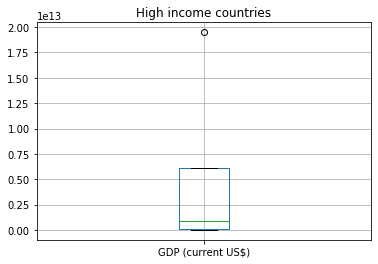

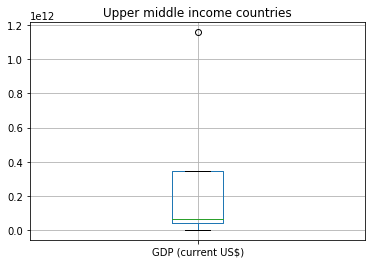

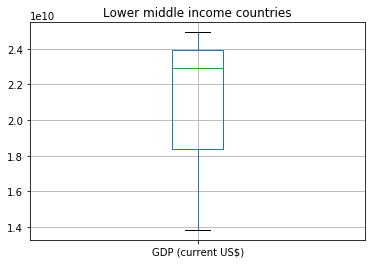

In [30]:
################################
#VISUAL OULIER DETECTION#
################################

######## GDP

hi_income_wdiw_slice = wdiw_slice[wdiw_slice['Income Group'] == 'High income']
upmid_income_wdiw_slice = wdiw_slice[wdiw_slice['Income Group'] == 'Upper middle income']
lomid_income_wdiw_slice = wdiw_slice[wdiw_slice['Income Group'] == 'Lower middle income']

hi_income_wdiw_slice.boxplot(column = 'GDP (current US$)')
plt.title('High income countries')
plt.show()

upmid_income_wdiw_slice.boxplot(column = 'GDP (current US$)')
plt.title('Upper middle income countries')
plt.show()

lomid_income_wdiw_slice.boxplot(column = 'GDP (current US$)')
plt.title('Lower middle income countries')
plt.show()


###We can see that the major outliers are USA and Canada in the High Income group
### In the middle income group, the outlier is Mexico a country with many resources and people, but yet consideres High-middle income

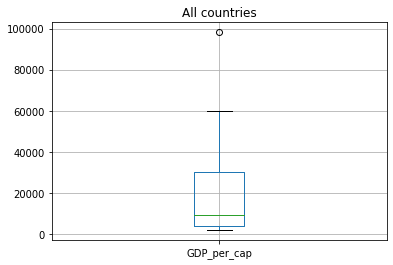

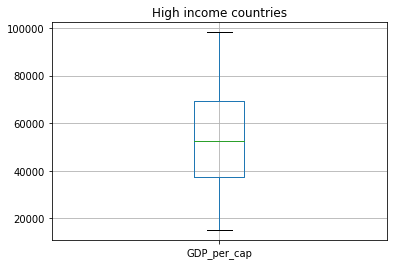

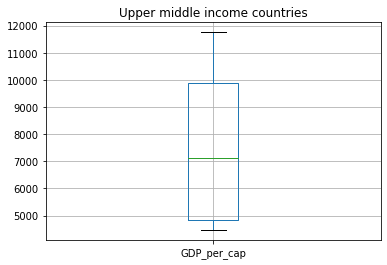

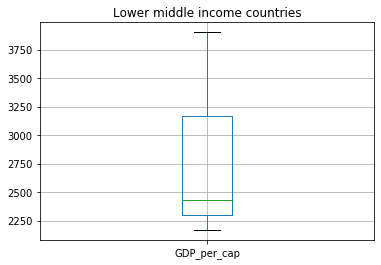

In [31]:
################################
#VISUAL OULIER DETECTION#
################################

######## GDP per capita

wdiw_slice.boxplot(column = 'GDP_per_cap')
plt.title('All countries')
plt.show()

#Here, the main outlier is Bermuda, a traditional tax heaven Tax Heaven that might have empty company shells. 
#This 'ghosts' companies might have a lot of money in their accounts, inflating the GDP of the country
#Given the relative low amount of population and squared Km, the GDP per capita is a clear outlier
#Source:
#https://www.imf.org/external/pubs/ft/fandd/2018/06/inside-the-world-of-global-tax-havens-and-offshore-banking/damgaard.htm

hi_income_wdiw_slice.boxplot(column = 'GDP_per_cap')
plt.title('High income countries')
plt.show()

upmid_income_wdiw_slice.boxplot(column = 'GDP_per_cap')
plt.title('Upper middle income countries')
plt.show()

lomid_income_wdiw_slice.boxplot(column = 'GDP_per_cap')
plt.title('Lower middle income countries')
plt.show()

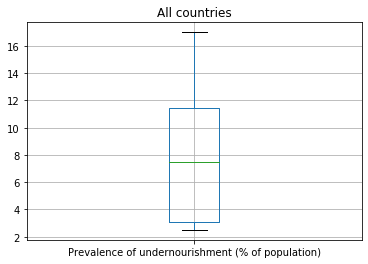

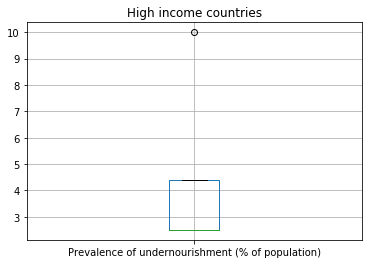

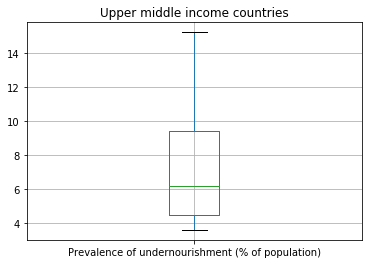

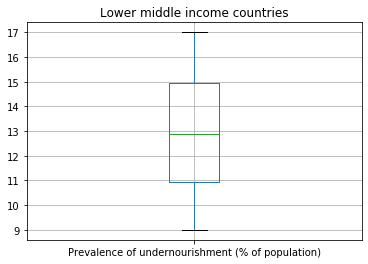

In [32]:
################################
#VISUAL OULIER DETECTION#
################################

######## UNDERNOURISHMENT 

wdiw_slice.boxplot(column = 'Prevalence of undernourishment (% of population)')
plt.title('All countries')
plt.show()


hi_income_wdiw_slice.boxplot(column = 'Prevalence of undernourishment (% of population)')
plt.title('High income countries')
plt.show()

upmid_income_wdiw_slice.boxplot(column = 'Prevalence of undernourishment (% of population)')
plt.title('Upper middle income countries')
plt.show()

lomid_income_wdiw_slice.boxplot(column = 'Prevalence of undernourishment (% of population)')
plt.title('Lower middle income countries')
plt.show()

#Panama is a clear outlier as a high income country and  having a very high prevalence of undernourishment

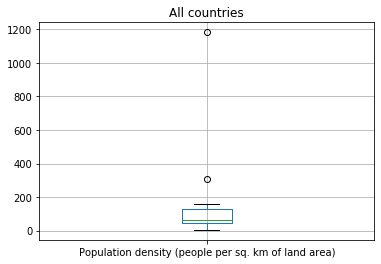

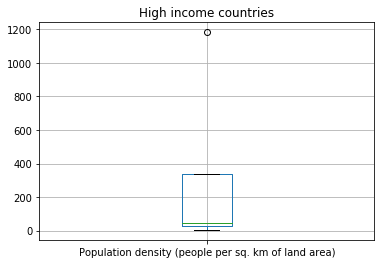

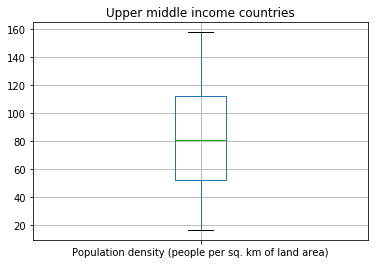

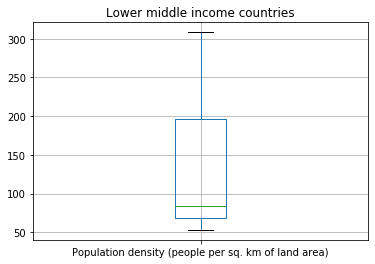

In [33]:
################################
#VISUAL OULIER DETECTION#
################################

######## POPULATION DENSITY

wdiw_slice.boxplot(column = 'Population density (people per sq. km of land area)')
plt.title('All countries')
plt.show()

#The two main outliers here where Bermuda and El Salvador

hi_income_wdiw_slice.boxplot(column = 'Population density (people per sq. km of land area)')
plt.title('High income countries')
plt.show()

upmid_income_wdiw_slice.boxplot(column = 'Population density (people per sq. km of land area)')
plt.title('Upper middle income countries')
plt.show()

lomid_income_wdiw_slice.boxplot(column = 'Population density (people per sq. km of land area)')
plt.title('Lower middle income countries')
plt.show()

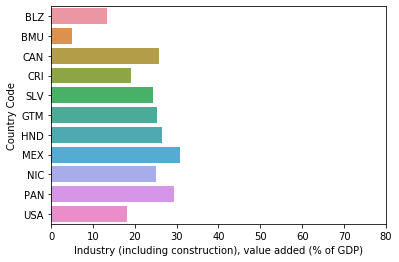

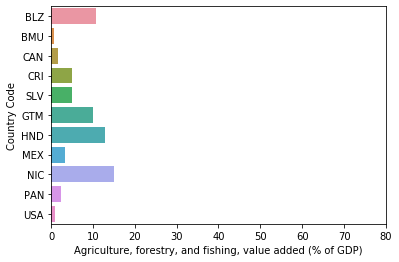

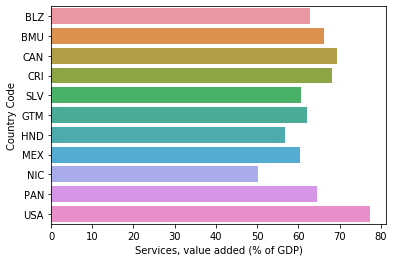

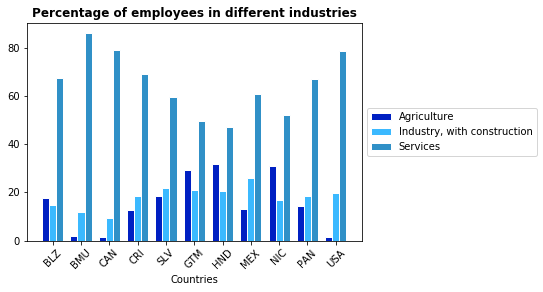

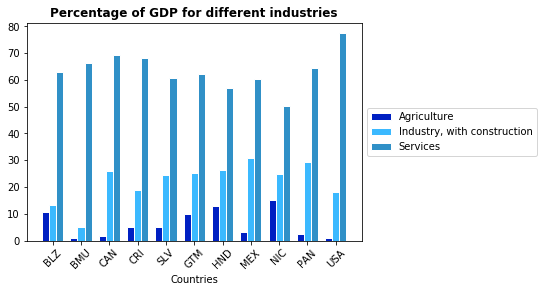

In [57]:
################################
#VISUAL OULIER DETECTION#
################################

######## PERCENTAGE OF GDP VALUE ADDED IN THE 3 MAIN SECTORS

#wdiw_slice_GDP_weight = wdiw_slice['Industry (including construction), value added (% of GDP)','Agriculture, forestry, and fishing, value added (% of GDP)','Services, value added (% of GDP)']
sns.barplot(x='Industry (including construction), value added (% of GDP)', y = 'Country Code', data= wdiw_slice)
plt.xticks([0,10,20,30,40,50,60,70,80],['0','10','20','30','40','50','60','70','80'])
plt.show()

sns.barplot(x='Agriculture, forestry, and fishing, value added (% of GDP)', y = 'Country Code', data= wdiw_slice)
plt.xticks([0,10,20,30,40,50,60,70,80],['0','10','20','30','40','50','60','70','80'])
plt.show()

sns.barplot(x='Services, value added (% of GDP)', y = 'Country Code', data= wdiw_slice)
plt.xticks([0,10,20,30,40,50,60,70,80],['0','10','20','30','40','50','60','70','80'])
plt.show()

##################################################################
#BARPLOT COMPARISON PERCENTAGE OF EMPLYMENT IN THE 3 MAIN SECTORS#
##################################################################

# set height of bar
barWidth = 0.25

bars1 = wdiw_hr['Employment in agriculture (% of total employment) (modeled ILO estimate)']
bars2 = wdiw_hr['Employment in industry (% of total employment) (modeled ILO estimate)']
bars3 = wdiw_hr['Employment in services (% of total employment) (modeled ILO estimate)']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#0020C2', width=barWidth, edgecolor='white', label='Agriculture')
plt.bar(r2, bars2, color='#3BB9FF', width=barWidth, edgecolor='white', label='Industry, with construction')
plt.bar(r3, bars3, color='#3090C7', width=barWidth, edgecolor='white', label='Services')
 
# Add xticks on the middle of the group bars
plt.xlabel('Countries')
plt.xticks([r + barWidth for r in range(len(bars1))], ['BLZ', 'BMU', 'CAN', 'CRI', 'SLV','GTM','HND','MEX','NIC','PAN','USA'])
plt.xticks(rotation=45)
plt.title('Percentage of employees in different industries', fontweight='bold')

 
# Create legend & Show graphic
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('Perc_emp.png', bbox_inches='tight')
plt.show()

#We can clearly see that our reagion is mainly focused on services. Both in terms of employment and percentage of GDP
#How does our region compare to the world in thi sense? It is an outlier in the world? Let's find out


##################################################################
#BARPLOT COMPARISON PERCENTAGE OF gdp IN THE 3 MAIN SECTORS#
##################################################################
# set height of bar
barWidth = 0.25

bars1 = wdiw_hr['Agriculture, forestry, and fishing, value added (% of GDP)']
bars2 = wdiw_hr['Industry (including construction), value added (% of GDP)']
bars3 = wdiw_hr['Services, value added (% of GDP)']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#0020C2', width=barWidth, edgecolor='white', label='Agriculture')
plt.bar(r2, bars2, color='#3BB9FF', width=barWidth, edgecolor='white', label='Industry, with construction')
plt.bar(r3, bars3, color='#3090C7', width=barWidth, edgecolor='white', label='Services')
 
# Add xticks on the middle of the group bars
plt.xlabel('Countries')
plt.xticks([r + barWidth for r in range(len(bars1))], ['BLZ', 'BMU', 'CAN', 'CRI', 'SLV','GTM','HND','MEX','NIC','PAN','USA'])
plt.xticks(rotation=45)
plt.title('Percentage of GDP for different industries', fontweight='bold')

 
# Create legend & Show graphic
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('Perc_gdp.png', bbox_inches='tight')
plt.show()

#We can clearly see that our reagion is mainly focused on services. Both in terms of employment and percentage of GDP
#How does our region compare to the world in thi sense? It is an outlier in the world? Let's find out


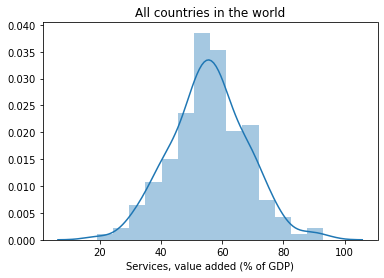

The Standad deviation of the world is 12.33 
The meaidan of the world is 55.64


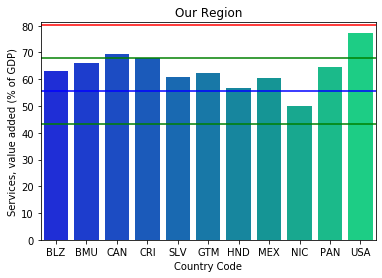

In [36]:
##################################################################
#COMPARISON OF GDP IN SERVICES IN OUR REGION AND THE WORLD#
##################################################################

world_gdp_services = wdiw_data['Services, value added (% of GDP)'].dropna()
sns.distplot(world_gdp_services)
plt.title('All countries in the world')
plt.show()

#It's interesting to see that the distribution of the world is quite normal, how's our region compared to this?
print('The Standad deviation of the world is ' + str(round(world_gdp_services.std(),2)), '\nThe meaidan of the world is ' + str(round(world_gdp_services.mean(),2)))

hr_gdp_services = wdiw_slice['Services, value added (% of GDP)']
sns.barplot(y= hr_gdp_services, x = 'Country Code', data = wdiw_slice, palette = 'winter')
plt.title('Our Region')

plt.axhline(world_gdp_services.mean(), color = 'b') #Mean of the world 

plt.axhline(world_gdp_services.mean() + world_gdp_services.std(), color = 'g') #One standard deviation above the mean

plt.axhline(world_gdp_services.mean() - world_gdp_services.std(), color = 'g') #One standard deviation below the mean

plt.axhline(world_gdp_services.mean() + world_gdp_services.std()*2, color = 'r') #Two standard deviation above the mean
plt.show()

#Interesting! We can see that eve if our region is mainly focused on services, it is falling very close to the world mean.
#The only special player is the USA, which has more services than the rest.

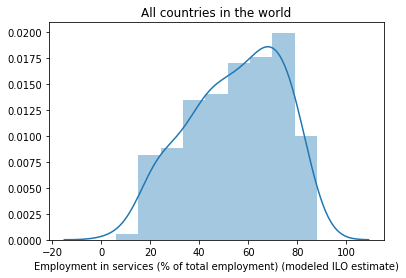

The Standad deviation of the world is 18.89 
The meaidan of the world is 54.68


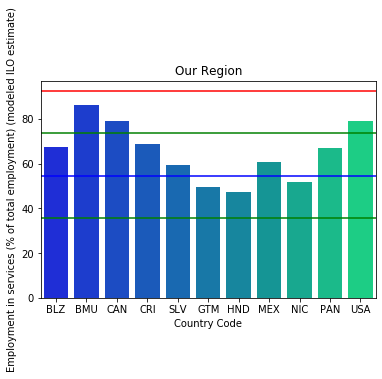

In [37]:
##################################################################
#COMPARISON OF EMPLOYMENT IN SERVICES IN OUR REGION AND THE WORLD#
##################################################################

world_emp_services = wdiw_data['Employment in services (% of total employment) (modeled ILO estimate)'].dropna()
sns.distplot(world_emp_services)
plt.title('All countries in the world')
plt.show()

print('The Standad deviation of the world is ' + str(round(world_emp_services.std(),2)), '\nThe meaidan of the world is ' + str(round(world_emp_services.mean(),2)))

hr_emp_services = wdiw_slice['Employment in services (% of total employment) (modeled ILO estimate)']
sns.barplot(y= hr_emp_services, x = 'Country Code', data = wdiw_slice, palette = 'winter')
plt.title('Our Region')

plt.axhline(world_emp_services.mean(), color = 'b') #Mean of the world 

plt.axhline(world_emp_services.mean() + world_emp_services.std(), color = 'g') #One standard deviation above the mean

plt.axhline(world_emp_services.mean() - world_emp_services.std(), color = 'g') #One standard deviation below the mean

plt.axhline(world_emp_services.mean() + world_emp_services.std()*2, color = 'r') #Two standard deviation above the mean
plt.show()


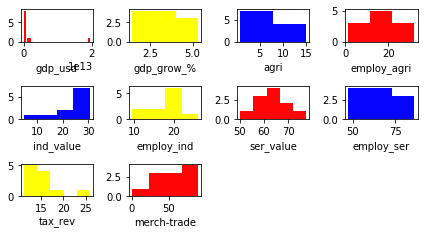

/Users/arnaldo/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:393: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
/Users/arnaldo/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:394: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
/Users/arnaldo/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/arnaldo/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


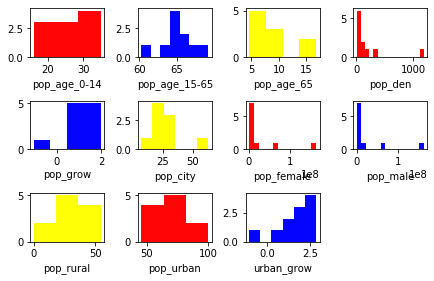

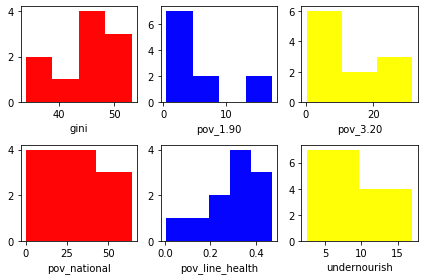

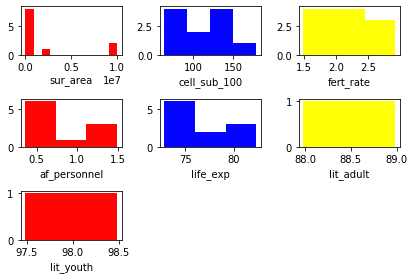

In [38]:
##################################################################
#HISTOGRAM FOR QUICK VISUAL ANALYSIS TO WHERE OUTLIERS MIGHT BE#
##################################################################

#ECONOMIC
plt.subplot(4,4,1) 
plt.hist(wdiw_hr['GDP (current US$)'],
         bins = 'fd',
         color='red',
         alpha = 0.98)

plt.xlabel('gdp_usd')


plt.subplot(4,4,2) 
plt.hist(wdiw_hr['GDP growth (annual %)'],
         bins = 'fd',
         color='yellow',
         alpha = 0.98)

plt.xlabel('gdp_grow_%')

plt.subplot(4,4,3) 
plt.hist(wdiw_hr['Agriculture, forestry, and fishing, value added (% of GDP)'],
         bins = 'fd',
         color='blue',
         alpha = 0.98)

plt.xlabel('agri')


plt.subplot(4,4,4) 
plt.hist(wdiw_hr['Employment in agriculture (% of total employment) (modeled ILO estimate)'],
         bins = 'fd',
         color='red',
         alpha = 0.98)

plt.xlabel('employ_agri')

plt.subplot(4,4,5) 
plt.hist(wdiw_hr['Industry (including construction), value added (% of GDP)'],
         bins = 'fd',
         color='blue',
         alpha = 0.98)
plt.xlabel('ind_value')


plt.subplot(4,4,6) 
plt.hist(wdiw_hr['Employment in industry (% of total employment) (modeled ILO estimate)'],
         bins = 'fd',
         color='yellow',
         alpha = 0.98)
plt.xlabel('employ_ind')

plt.subplot(4,4,7) 
plt.hist(wdiw_hr['Services, value added (% of GDP)'],
         bins = 'fd',
         color='red',
         alpha = 0.98)
plt.xlabel('ser_value')

plt.subplot(4,4,8) 
plt.hist(wdiw_hr['Employment in services (% of total employment) (modeled ILO estimate)'],
         bins = 'fd',
         color='blue',
         alpha = 0.98)
plt.xlabel('employ_ser')

plt.subplot(4,4,9) 
plt.hist(wdiw_hr['Tax revenue (% of GDP)'],
         bins = 'fd',
         color='yellow',
         alpha = 0.98)
plt.xlabel('tax_rev')

plt.subplot(4,4,10) 
plt.hist(wdiw_hr['Merchandise trade (% of GDP)'],
         bins = 'fd',
         color='red',
         alpha = 0.98)
plt.xlabel('merch-trade')


# saving the results to the working directory with savefig()
#plt.savefig('Economic histogrm.png')

# displaying the results
plt.tight_layout()
plt.show()

#Population
plt.subplot(3,4,1) 
plt.hist(wdiw_hr['Population ages 0-14 (% of total population)'],
         bins = 'fd',
         color='red',
         alpha = 0.98)
plt.xlabel('pop_age_0-14')


plt.subplot(3,4,2) 
plt.hist(wdiw_hr['Population ages 15-64 (% of total population)'],
         bins = 'fd',
         color='blue',
         alpha = 0.98)
plt.xlabel('pop_age_15-65')


plt.subplot(3,4,3) 
plt.hist(wdiw_hr['Population ages 65 and above (% of total population)'],
         bins = 'fd',
         color='yellow',
         alpha = 0.98)
plt.xlabel('pop_age_65')


plt.subplot(3,4,4) 
plt.hist(wdiw_hr['Population density (people per sq. km of land area)'],
         bins = 'fd',
         color='red',
         alpha = 0.98)
plt.xlabel('pop_den')

plt.subplot(3,4,5) 
plt.hist(wdiw_hr['Population growth (annual %)'],
         bins = 'fd',
         color='blue',
         alpha = 0.98)
plt.xlabel('pop_grow')

plt.subplot(3,4,6) 
plt.hist(wdiw_hr['Population in the largest city (% of urban population)'],
         bins = 'fd',
         color='yellow',
         alpha = 0.98)
plt.xlabel('pop_city')


plt.subplot(3,4,7) 
plt.hist(wdiw_hr['Population, female'],
         bins = 'fd',
         color='red',
         alpha = 0.98)
plt.xlabel('pop_female')

plt.subplot(3,4,8) 
plt.hist(wdiw_hr['Population, male'],
         bins = 'fd',
         color='blue',
         alpha = 0.98)
plt.xlabel('pop_male')

plt.subplot(3,4,9) 
plt.hist(wdiw_hr['Rural population (% of total population)'],
         bins = 'fd',
         color='yellow',
         alpha = 0.98)
plt.xlabel('pop_rural')

plt.subplot(3,4,10) 
plt.hist(wdiw_hr['Urban population (% of total population)'],
         bins = 'fd',
         color='red',
         alpha = 0.98)
plt.xlabel('pop_urban')

plt.subplot(3,4,11) 
plt.hist(wdiw_hr['Urban population growth (annual %)'],
         bins = 'fd',
         color='blue',
         alpha = 0.98)
plt.xlabel('urban_grow')

# saving the results to the working directory with savefig()
#plt.savefig('Population histogrm.png')

# displaying the results
plt.tight_layout()
plt.show()



#Poverty

plt.subplot(2,3,1) 
plt.hist(wdiw_hr['GINI index (World Bank estimate)'],
         bins = 'fd',
         color='red',
         alpha = 0.98)
plt.xlabel('gini')

plt.subplot(2,3,2) 
plt.hist(wdiw_hr['Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)'],
         bins = 'fd',
         color='blue',
         alpha = 0.98)
plt.xlabel('pov_1.90')

plt.subplot(2,3,3) 
plt.hist(wdiw_hr['Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)'],
         bins = 'fd',
         color='yellow',
         alpha = 0.98)
plt.xlabel('pov_3.20')

plt.subplot(2,3,4) 
plt.hist(wdiw_hr['Poverty headcount ratio at national poverty lines (% of population)'],
         bins = 'fd',
         color='red',
         alpha = 0.98)
plt.xlabel('pov_national')

plt.subplot(2,3,5) 
plt.hist(wdiw_hr['Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure'],
         bins = 'fd',
         color='blue',
         alpha = 0.98)
plt.xlabel('pov_line_health')

plt.subplot(2,3,6) 
plt.hist(wdiw_hr['Prevalence of undernourishment (% of population)'],
         bins = 'fd',
         color='yellow',
         alpha = 0.98)
plt.xlabel('undernourish')

# saving the results to the working directory with savefig()
#plt.savefig('Poverty  histogrm.png')

# displaying the results
plt.tight_layout()
plt.show()

#Other

plt.subplot(3,3,1) 
plt.hist(wdiw_hr['Surface area (sq. km)'],
         bins = 'fd',
         color='red',
         alpha = 0.98)
plt.xlabel('sur_area')

plt.subplot(3,3,2) 
plt.hist(wdiw_hr['Mobile cellular subscriptions (per 100 people)'],
         bins = 'fd',
         color='blue',
         alpha = 0.98)
plt.xlabel('cell_sub_100')

plt.subplot(3,3,3) 
plt.hist(wdiw_hr['Fertility rate, total (births per woman)'],
         bins = 'fd',
         color='yellow',
         alpha = 0.98)
plt.xlabel('fert_rate')

plt.subplot(3,3,4) 
plt.hist(wdiw_hr['Armed forces personnel (% of total labor force)'],
         bins = 'fd',
         color='red',
         alpha = 0.98)
plt.xlabel('af_personnel')

plt.subplot(3,3,5) 
plt.hist(wdiw_hr['Life expectancy at birth, total (years)'],
         bins = 'fd',
         color='blue',
         alpha = 0.98)
plt.xlabel('life_exp')

plt.subplot(3,3,6) 
plt.hist(wdiw_hr['Literacy rate, adult total (% of people ages 15 and above)'],
         bins = 'fd',
         color='yellow',
         alpha = 0.98)
plt.xlabel('lit_adult')

plt.subplot(3,3,7) 
plt.hist(wdiw_hr['Literacy rate, youth total (% of people ages 15-24)'],
         bins = 'fd',
         color='red',
         alpha = 0.98)
plt.xlabel('lit_youth')


# saving the results to the working directory with savefig()
#plt.savefig('Other  histogrm.png')

# displaying the results
plt.tight_layout()
plt.show()

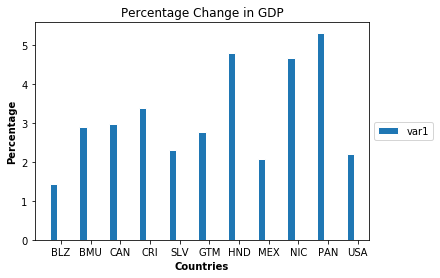

In [39]:
##################################################################
##GDP GROWTH
##################################################################


# set height of bar

barWidth = 0.25

bars1 = wdiw_hr['GDP growth (annual %)']


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='var1')

 
# Add xticks on the middle of the group bars
plt.xlabel('Countries', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.title('Percentage Change in GDP')
plt.xticks([r + barWidth for r in range(len(bars1))], ['BLZ', 'BMU', 'CAN', 'CRI', 'SLV','GTM','HND','MEX','NIC','PAN','USA'])



# Create legend & Show graphic
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()




#There are three main growing countries: Honduras, Nicaragua and Panama. 
#Are these also the most inequal in terms of wealth? Let's Check out the GINI index

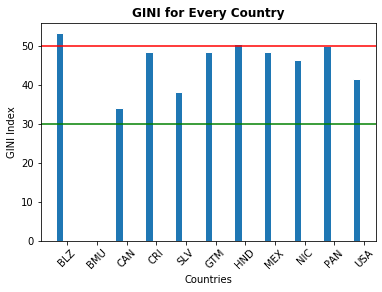

In [40]:
##################################################################
##GINI INDEX
##################################################################

# set height of bar

barWidth = 0.25
GINI_limit_hi = 50
GINI_limit_low = 30
bars1 = wdiw_slice['GINI index (World Bank estimate)']


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='var1')

 
# Add xticks on the middle of the group bars
plt.axhline(GINI_limit_hi,
            color = 'red')
plt.axhline(GINI_limit_low,
            color = 'green')

plt.xlabel('Countries')
plt.ylabel('GINI Index' )
plt.title('GINI for Every Country', fontweight='bold')
plt.xticks(rotation=45)
plt.xticks([r + barWidth for r in range(len(bars1))], ['BLZ', 'BMU', 'CAN', 'CRI', 'SLV','GTM','HND','MEX','NIC','PAN','USA'])

# Create legend & Show graphic
plt.savefig('GINI.png', bbox_inches='tight')
plt.show()


#A GINI index above 50 (represented by the red line) is considered high, which means that inequality is quite significant
#A GINI below 30 (green line) is considered low, and therefore more equality exists in the country in terms of wealth

#Honduras and Panama are very close to the 50 threshold, which means that these are very unequal contries
#Nicaragua is a bit more equal, but also very high. 

#There countries therefore are growing in expenses of the poor people who lives more poor while the rich get richer. 

## Multivariate plotting: Scatterplots and heatmaps
<br><br>

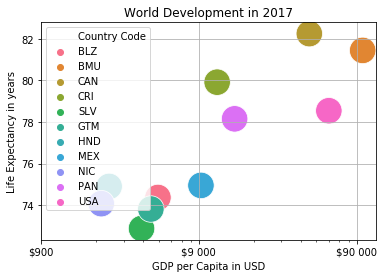

In [43]:
##################################################################
##GDP PER CAPITA VS LIFE EXPECTANCY (HOT ROD)
##################################################################

pop = wdiw_hr['Population, total']

np_pop = np.array(pop)

sns.scatterplot(x       = 'GDP_per_cap', 
                y       = 'Life expectancy at birth, total (years)', 
                data    = wdiw_hr, 
                hue     = 'Country Code' ,
                s       =  700,
                alpha   = 'auto')

plt.xscale('log')
plt.xlabel('GDP per Capita in USD')
plt.ylabel('Life Expectancy in years')
plt.title('World Development in 2017')
plt.xticks([900, 9000, 90000], ['$900', '$9 000', '$90 000'])
plt.legend(loc = "upper left")
plt.grid(True)
plt.show()

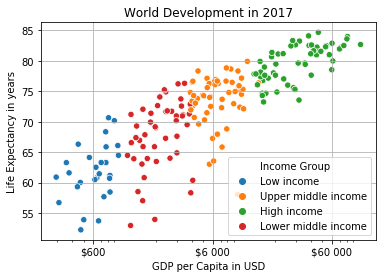

In [44]:
##################################################################
##GDP PER CAPITA VS LIFE EXPECTANCY (WORLD)
##################################################################

pop_1 = wdiw_data['Population, total']

np_pop_1 = np.array(pop_1)

sns.scatterplot(x       ='GDP_per_cap_all', 
                y       ='Life expectancy at birth, total (years)', 
                data    = wdiw_data,
                hue     ='Income Group' ,
                s       = 40,
                alpha   ='auto')

plt.xscale('log')
plt.xlabel('GDP per Capita in USD')
plt.ylabel('Life Expectancy in years')
plt.title('World Development in 2017')
plt.xticks([600, 6000, 60000], ['$600', '$6 000', '$60 000'])

plt.grid(True)
plt.show()

# Most people live in middle-income countries, but there are big gaps
# https://www.gapminder.org/answers/how-does-income-relate-to-life-expectancy/

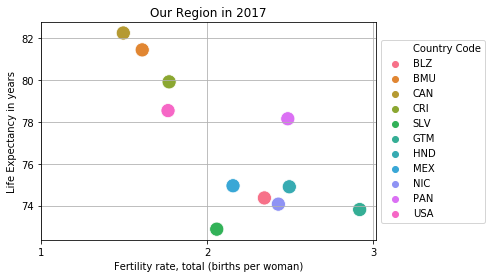

In [46]:
##################################################################
##FERTILITY RATE VS LIFE EXPECTANCY (HOT ROD)
##################################################################

sns.scatterplot(x       ='Fertility rate, total (births per woman)', 
                y       ='Life expectancy at birth, total (years)', 
                data    = wdiw_slice,
                hue     ='Country Code' ,
                s       = 200,
                alpha   ='auto')

plt.xlabel('Fertility rate, total (births per woman)')
plt.ylabel('Life Expectancy in years')
plt.title('Our Region in 2017')
plt.xticks([1, 2, 3], ['1', '2', '3'])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.savefig('Fertility_vlife.png', bbox_inches='tight')
plt.show()

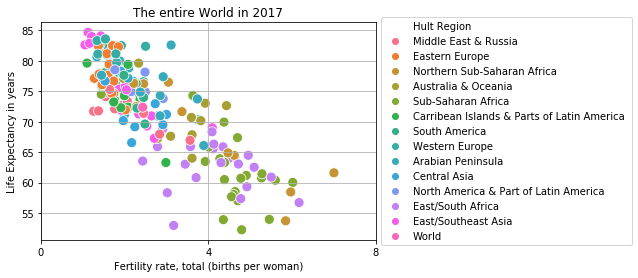

In [47]:
##################################################################
##GDP PER CAPITA VS LIFE EXPECTANCY (WORLD)
##################################################################

sns.scatterplot(x       ='Fertility rate, total (births per woman)', 
                y       ='Life expectancy at birth, total (years)', 
                data    = wdiw_data,
                hue     ='Hult Region' ,
                s       = 100,
                alpha   ='auto')

plt.xlabel('Fertility rate, total (births per woman)')
plt.ylabel('Life Expectancy in years')
plt.title('The entire World in 2017')
plt.xticks([0, 4, 8], ['0', '4', '8'])


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.savefig('Fertility_vlife_world.png', bbox_inches='tight')
plt.show()

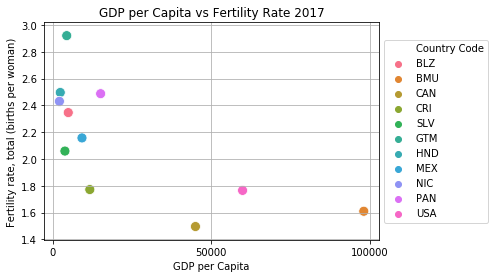

In [48]:
##################################################################
##GDP PER CAPITA VS FERTILITY RATE (HOT ROD)
##################################################################

sns.scatterplot(y       ='Fertility rate, total (births per woman)', 
                x       ='GDP_per_cap', 
                data    = wdiw_slice,
                hue     ='Country Code' ,
                s       = 100,
                alpha   ='auto')

plt.ylabel('Fertility rate, total (births per woman)')
plt.xlabel('GDP per Capita')
plt.title('GDP per Capita vs Fertility Rate 2017', )
plt.xticks([0, 50000, 100000], ['0', '50000', '100000',])


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.savefig('Fertility_vgdp.png', bbox_inches='tight')
plt.show()

#Honduras has the highest fertility rate from our data set and it's a Lower middle income 
#We were expecting salvador to have the lowest fertlity because it's in the lower middle income
#Bermuda has the highest gdp per capita $98152.3 with 1.61

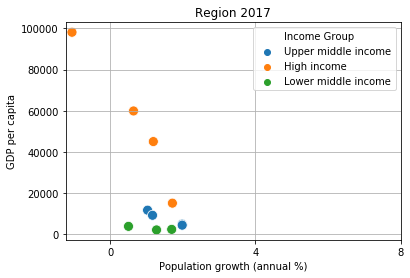

In [49]:
##################################################################
##GDP PER CAPITA VS POPULATION GROWTH (HOT ROD)
##################################################################

sns.scatterplot(x       ='Population growth (annual %)', 
                y       ='GDP_per_cap', 
                data    = wdiw_slice,
                hue     ='Income Group' ,
                s       = 100,
                alpha   ='auto')

plt.xlabel('Population growth (annual %)')
plt.ylabel('GDP per capita')
plt.title('Region 2017')
plt.xticks([0, 4, 8], ['0', '4', '8'])

plt.grid(True)
plt.show()

#Bermuda is the only one with negative growth -1.054914 that makes sense with our chart of fertility rate.4
#BERMUDA FERTILITY: "The increase in the death rate may be attributed to baby boomers (persons born between the years 1946 and 1964) reaching an age where the probability of dying is much higher. Because women are older, they are not reproducing"
#https://www.gov.bm/sites/default/files/Bermuda-Population-Projections-2016-2026.pdf
#The growth can be from : Tax Haven, British Colony.

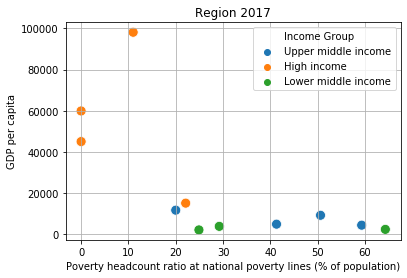

In [50]:
##################################################################
##GDP PER CAPITA VS POVERTY HEADCOUNT (HOT ROD)
##################################################################

sns.scatterplot(x       ='Poverty headcount ratio at national poverty lines (% of population)', 
                y       ='GDP_per_cap', 
                data    = wdiw_slice,
                hue     ='Income Group' ,
                s       = 100,
                alpha   ='auto')

plt.xlabel('Poverty headcount ratio at national poverty lines (% of population)')
plt.ylabel('GDP per capita')
plt.title('Region 2017')
plt.xticks([0, 10, 20,30,40,50,60], ['0', '10', '20','30','40','50','60'])

plt.grid(True)
plt.show()

#We have 3 countries that are above 50 %
#Honduras is a lower income country with the highest poverty and followed for Guatemala is a Upper middle country 
#Canada and USA has 0% poverty lines
#Panama has more than 20% poverty being a High Income country

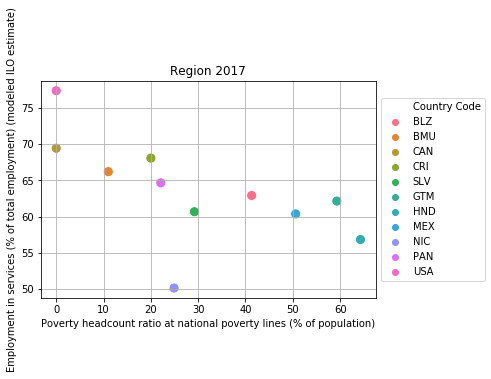

In [51]:
##################################################################
##POVERTY HEADCOUNT VS EMPLOTYMENT IN SERVICES(HOT ROD)
##################################################################

sns.scatterplot(x       ='Poverty headcount ratio at national poverty lines (% of population)', 
                y       ='Services, value added (% of GDP)', 
                data    = wdiw_slice,
                hue     ='Country Code' ,
                s       = 100,
                alpha   ='auto')

plt.xlabel('Poverty headcount ratio at national poverty lines (% of population)')
plt.ylabel('Employment in services (% of total employment) (modeled ILO estimate)')
plt.title('Region 2017')
plt.xticks([0, 10, 20,30,40,50,60], ['0', '10', '20','30','40','50','60'])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

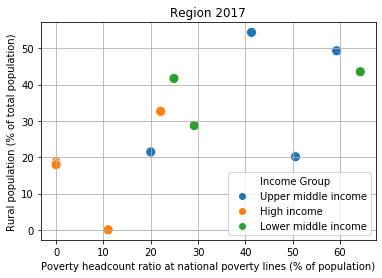

In [53]:
##################################################################
##POVERTY HEADCOUNT VS RURAL POPULATION (HOT ROD)
##################################################################

sns.scatterplot(x       ='Poverty headcount ratio at national poverty lines (% of population)', 
                y       ='Rural population (% of total population)', 
                data    = wdiw_slice,
                hue     ='Income Group' ,
                s       = 100,
                alpha   ='auto')

plt.xlabel('Poverty headcount ratio at national poverty lines (% of population)')
plt.ylabel('Rural population (% of total population)')
plt.title('Region 2017')
plt.xticks([0, 10, 20,30,40,50,60], ['0', '10', '20','30','40','50','60'])

plt.grid(True)
plt.show()
#It has no huge relation these two variables. Scattering is high

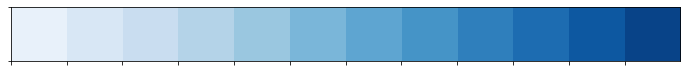

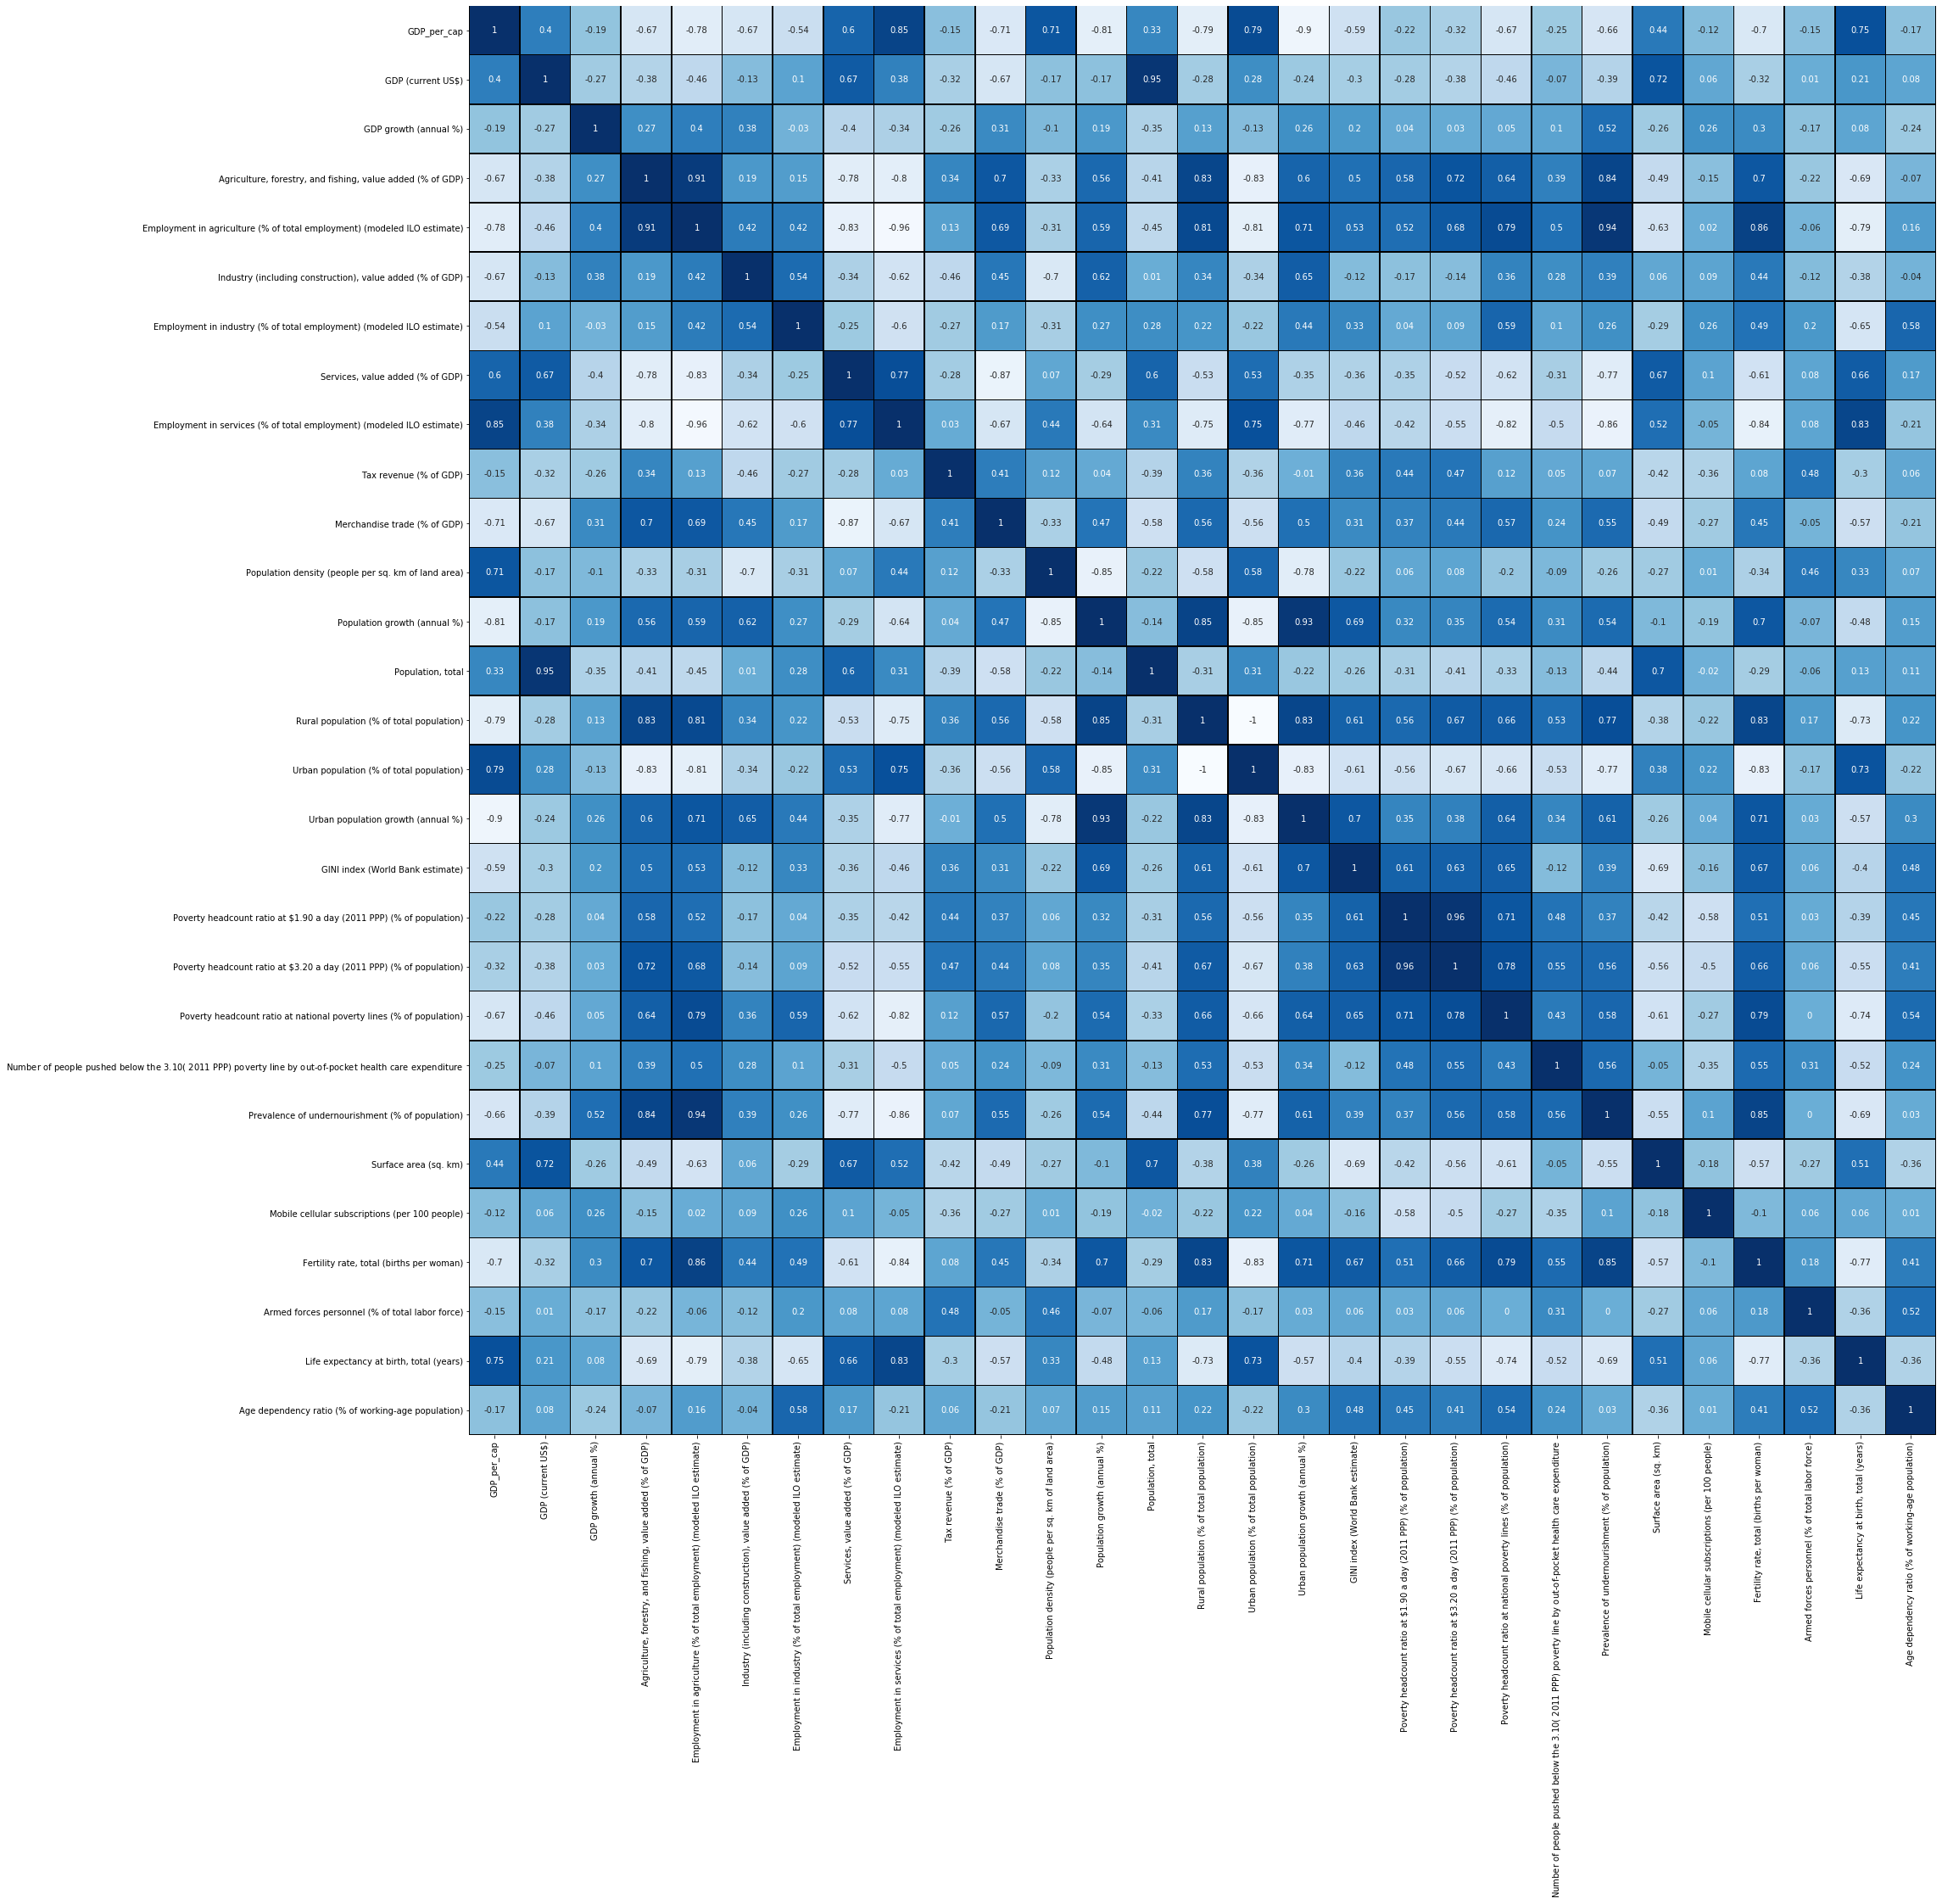

In [55]:
##################################################################
##OVERALL HEATMAP (HOT ROD)
##################################################################


df_corr = wdiw_slice.corr().round(2)

# Using palplot to view a color scheme
sns.palplot(sns.color_palette('Blues', 12))


# specifying plot size
fig, ax = plt.subplots(figsize=(31,31))


# creating a heatmap
sns.heatmap(df_corr,
            cmap = 'Blues',
            square = False,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)

# reconfiguring the plot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

# saving the figure and displaying the plot
plt.show()



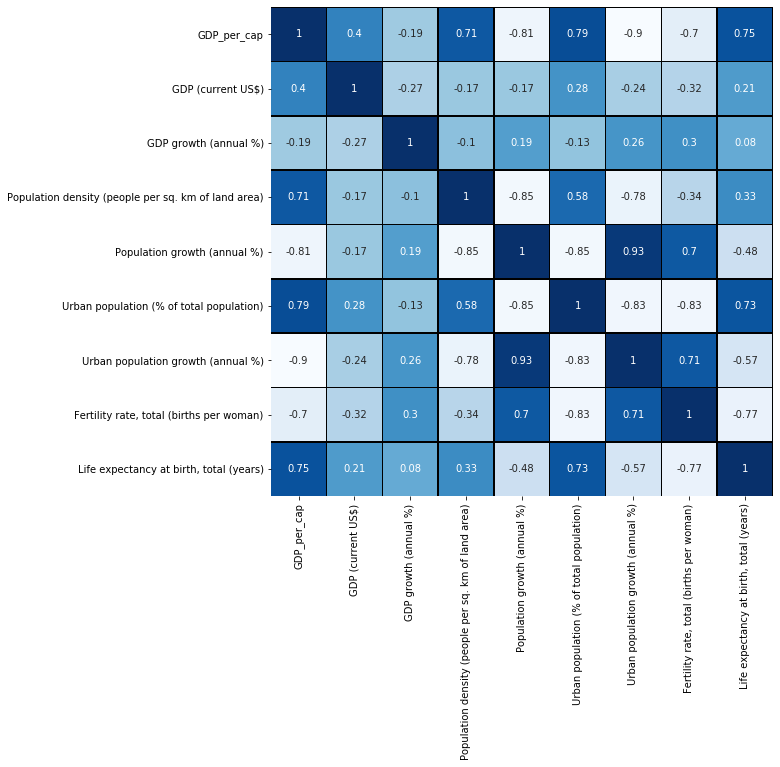

In [56]:
##################################################################
##HEATMAP WITH MOST RELEVANT VARIABLES (HOT ROD)
##################################################################

wdiw_slice_con = wdiw_slice[[
'Country Code',
'Income Group',
'GDP_per_cap',
'GDP (current US$)',
'GDP growth (annual %)',
'Population density (people per sq. km of land area)',
'Population growth (annual %)',
'Urban population (% of total population)',
'Urban population growth (annual %)',
'Fertility rate, total (births per woman)',
'Life expectancy at birth, total (years)']]

df_corr_2 = wdiw_slice_con.corr().round(2)

# Using palplot to view a color scheme
#sns.palplot(sns.color_palette('Blues', 12))


# specifying plot size
fig, ax = plt.subplots(figsize=(9,9))


# creating a heatmap
sns.heatmap(df_corr_2,
            cmap = 'Blues',
            square = False,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)

# reconfiguring the plot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

# saving the figure and displaying the plot
plt.savefig('Heatmap.png', bbox_inches='tight')
plt.show()


# Higher urban pop, lower pop growth. 
# This is due to higher GDP per cap in urban places
# Aka people in cities are most likely richer, 
# which often tells us that people birth less children